# Intro to Machine Learning

#### Phys 427 Lab 4
#### *Jeff Capoeman*

In [13]:
import numpy as np
import matplotlib.pyplot as plot
import pandas
import uproot
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

## **Boosted Decison Tree**

#### Boosted decision tree learning is a method used to predict the value of a variable using strings of logic against other variables. In essence, you have an input data set that you run through a series of logic statements(if, then, where), and from this you can infer the output data. Decision tree and boosted decision trees come in pre packaged algorithams in scikit learn called DecesionTreeRegressor and Adaboost.

## **Neural Networks**

#### Neural networks use a combination of networked logic functions. You start with an input or multiple inputs, with a bias for this set of inputs, this is then passed into a logic function and then pushed to an output. This can be considered as one 'perceptron' of the network where in the network as a whole, you can have multiple 'perceptrons' passed into logic functions, and then pushed out to a(n) output(s)("A Beginners Guide to Neural Networks in Python", Jose Portilla, https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/). There is a pre packaged neural network function in scikit learn called neural_network.MLPRegressor.

In [14]:
df_1 = uproot.open("df_1.root")
df_2 = uproot.open("df_2.root")
df_3 = uproot.open("df_3.root")
df_4 = uproot.open("df_4.root")
df_5 = uproot.open("df_5.root")
df_6 = uproot.open("df_6.root")

#downloads root files to the notebook

In [15]:
df_1 = df_1["pandas_tree218"]
df_2 = df_2["pandas_tree51358"]
df_3 = df_3["pandas_tree53278"]
df_4 = df_4["pandas_tree52558"]
df_5 = df_5["pandas_tree53038"]
df_6 = df_6["pandas_tree54718"]

# called the branch name in data tree

In [16]:
df_1 = df_1.pandas.df()
df_2 = df_2.pandas.df()
df_3 = df_3.pandas.df()
df_4 = df_4.pandas.df()
df_5 = df_5.pandas.df()
df_6 = df_6.pandas.df()

#creates pandas dataframes with all values

Data = pandas.concat({'df_1':df_1, 'df_2':df_2, 'df_3':df_3, 'df_4':df_4, 'df_5':df_5, 'df_6':df_6}, sort = True)
#collects all pandas arrays and collapses them into a single data frame

In [27]:
Data_1 = Data.loc[Data['IsLLP'] == True]

# filters data to accept only the long lived particles

Datafit = Data_1.drop(columns = ['JetPt', 'RunNumber', 'EventNumber', 'JetEta', 'JetPhi', 'IsLLP', 'nLLPs_Near_Jets', 'Lx', 'Ly', 'Lz', 'Leta', 'Lphi', 'Lpt', 'Lpz'])
#filters data to fit against L_xy, excluding the already predicted data

L_xy = np.sqrt((Data_1['Lx'])**2 + (Data_1['Ly'])**2) # Actual value of L_xy

## Boosted Decision Tree

### Starting first with a boosted decision tree, I will train the filtered data above and then predict an L_xy value. Scatter plots of predicted and actual L_xy are shown below.

In [20]:
regression = AdaBoostRegressor() #creates our regression function

regression.fit(Datafit, L_xy) #trains our data

L_xy_predict = regression.predict(Datafit) #creates array of our predicted value

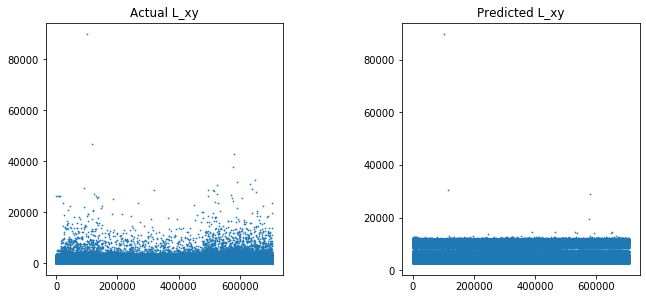

In [21]:
x = np.arange(0, 707209) #creates a data set axis for us to plot against

plot.subplot(121) 
plot.scatter(x, L_xy, s = 0.5)
plot.title('Actual L_xy')

plot.subplot(122)
plot.scatter(x, L_xy_predict, s = 0.5)
plot.title('Predicted L_xy')

plot.subplots_adjust(top = 1, right = 1.5, wspace = 0.5, hspace = 0.5)
plot.show()

## Neural Network

### Next I will train the filtered data against L_xy using Neural Network. I will do this using the built in function, 'MLPRegressor' from scikitlearn. Again, scatter plots of actual and predicted L_xy are shown below.

In [30]:
from sklearn.neural_network import MLPRegressor

NN = MLPRegressor(hidden_layer_sizes = (22, 11)) #This is the training function that we will use for Neural Networks

NN.fit(Datafit, L_xy) # Trains data using Neural Network

L_xy_predict2 = NN.predict(Datafit) #creates array of our predicted value

C:\Users\jcapo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


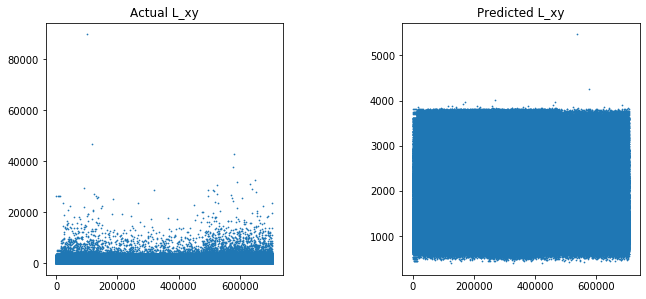

In [32]:
x = np.arange(0, 707209)

plot.subplot(121) 
plot.scatter(x, L_xy, s = 0.5)
plot.title('Actual L_xy')

plot.subplot(122)
plot.scatter(x, L_xy_predict2, s = 0.5)
plot.title('Predicted L_xy')

plot.subplots_adjust(top = 1, right = 1.5, wspace = 0.5, hspace = 0.5)
plot.show()

### Next we will train our data against IsLLP false jets. 

In [26]:
Data_2 = Data.loc[Data['IsLLP'] == False]

# filters data to accept no long lived particles

Datafit2 = Data_2.drop(columns = ['JetPt', 'RunNumber', 'EventNumber', 'JetEta', 'JetPhi', 'IsLLP', 'nLLPs_Near_Jets', 'Lx', 'Ly', 'Lz', 'Leta', 'Lphi', 'Lpt', 'Lpz'])
#filters data to fit against L_xy, excluding the already predicted data

L_xy2 = np.sqrt((Data_2['Lx'])**2 + (Data_2['Ly'])**2) # Actual value of L_xy for IsLLP = False

In [ ]:
regression.fit(Datafit2, L_xy2)

L_xy_predict3 = regression.predict(Datafit2, L_xy2)

NN.fit(Datafit2, L_xy2)

L_xy_predict4 = NN.predict(Datafit2, L_xy2)

#trains data for both a BDT and a NN

In [ ]:
a = len(L_xy2) #this ensures that our scatter plot has a correct size axis

x = np.arange(0, a) #creates axis to plot against

plot.subplot(121) 
plot.scatter(x, L_xy, s = 0.5)
plot.title('Actual L_xy')

plot.subplot(122)
plot.scatter(x, L_xy_predict2, s = 0.5)
plot.title('Predicted L_xy')

plot.subplots_adjust(top = 1, right = 1.5, wspace = 0.5, hspace = 0.5)
plot.show()